# Proyecto #

In [67]:
# Instalación de dependencias:
#!pip install nltk

# Entedimiento de los Datos #

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import replace
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import load,  dump
#import dill  # the code below will fail without this line
import pickle
from tfidf import Tfidf
from PredictionModel import tokenizer

In [69]:
df = pd.read_csv('C:/Users/Asus/OneDrive - Universidad de los Andes/OCTAVO SEMESTRE/ISIS - BUSINESS INTELLIGENCE/Proyecto/DatosSuicidio/SuicidiosProyecto.csv')
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

# Preparación de los datos

In [70]:
df.head(15)

,text,class
0,i want to destroy myselffor once everything wa...,suicide
1,I kinda got behind schedule with learning for ...,non-suicide
2,I'm just not sure anymoreFirst and foremost: I...,suicide
3,please give me a reason to liveThats too much ...,suicide
4,27f struggling to find meaning moving forwardI...,suicide
5,Let’s get this bread 😎 Anyone know any good ba...,non-suicide
6,"Day 126 of posting random ""fun"" facts everyday...",non-suicide
7,Little brother is self mutilating. Please help...,suicide
8,Why do women always go in groups to their wash...,non-suicide
9,Did you guys know that there's no school for g...,non-suicide


In [71]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [72]:
def text(text):
    if('suicide'==text):
        return 1
    if('non-suicide'==text):
        return 0
    return None
df['class'] = df['class'].apply(text)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size = 0.2, random_state = 1)

## TF-IDF

### Pipeline con TF-IDF y Algoritmo-LinearSVC

In [74]:

pipeline = Pipeline(
    [  
        ('tfidf', TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)),
        ('model', LinearSVC(C=0.588, dual=True, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.00001,
          verbose=0))
    ]
)

X_tfidf_train_pipe = pipeline["tfidf"].fit_transform(X_train)
pipeline['model'].fit(X_tfidf_train_pipe, y_train)

## Save the pipeline
dump(pipeline, 'assets/text_classifier.joblib') 

['assets/text_classifier.joblib']

### Prueba del pipeline

In [76]:
pipeline_imported = load('assets/text_classifier.joblib')

msg = "I'm tired of everything. I want to die. I hate myself too much."
msg2= "I want to rest in piece, I can't still living this shit of life. I quit."
msg3 = "It ends tonight. I can't do it anymore. I quit."
msg4 = "Live is love. You don't have truth reasons to quit :D. Look for help my friend."
lista_msgs= [msg,msg2,msg3,msg4]
predicciones2 = pipeline_imported['model'].predict(pipeline_imported['tfidf'].transform(pd.Series(lista_msgs)))
predicciones2


array([1, 1, 1, 0], dtype=int64)

In [79]:

X_tfidf_test = pipeline_imported['tfidf'].transform(X_test)
y_train_tfidf_linear_predict = pipeline['model'].predict(X_tfidf_train_pipe)
y_test_tfidf_linear_predict = pipeline['model'].predict(X_tfidf_test)

# Análisis de los resultados #

###  TF-IDF con Algoritmo-LinearSVC

In [77]:
pd.Series(pipeline_imported['model'].coef_[0], index = pipeline_imported['tfidf'].vocabulary_.keys()).sort_values().tail(20).keys()

Index(['anhedonic', '500,000', 'eht', 'corona's', 'sleepyhead', 'dado',
       'darin's', 'antoher', 'markers', 'kille', 'grail', 'pitre', 'contibe',
       'anti-intellectualism', 'absorb', 'fossils', 'partialiy', 'gma',
       'mosley', 'tccbww'],
      dtype='object')

In [ ]:
y_train_tfidf_linear_predict = pipeline['model'].predict(X_tfidf_train_pipe)
y_test_tfidf_linear_predict = pipeline['model'].predict(X_tfidf_test)

#### Metricas Train

Accuracy: 97.0350%
Precision: 96.5370%
Recall: 96.7003%
F1: 96.6186%


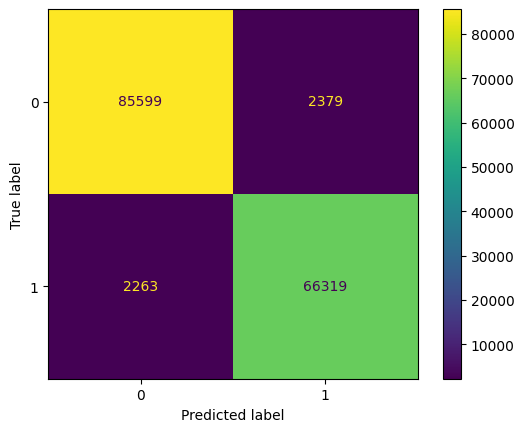

In [ ]:
print(f"Accuracy: {accuracy_score(y_train, y_train_tfidf_linear_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_tfidf_linear_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_tfidf_linear_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_tfidf_linear_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_linear_predict)

#### Metricas Test

Accuracy: 94.5248%
Precision: 94.5816%
Recall: 92.6680%
F1: 93.6150%


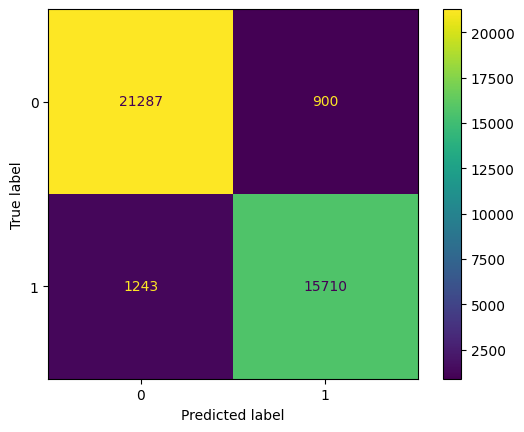

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_test_tfidf_linear_predict):.4%}")
print(f'Precision: {precision_score(y_test,y_test_tfidf_linear_predict):.4%}')
print(f'Recall: {recall_score(y_test,y_test_tfidf_linear_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_tfidf_linear_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_linear_predict)